In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
from MTGA.MTGA import *

from MTGA.MTGAInstance import Instance
import MTGA.Generators as Generators
import MTGA.Mutators as Mutators
import MTGA.WeightGenerators as WeightGenerators
import MTGA.GeneMutators as GeneMutators
import Fixers as Fixers
import Evaluators as Evaluators

from MTGA.GeneVisualizer import GeneEvolutionRenderer
from Displayer import Displayer

from Utils import *


## Main Instance

In [51]:
instance = Instance("problems/p5.json",
    evaluator=Evaluators.CummulativeEvaluator(),
    mutator=Mutators.WalkMutator(),
    generator=Generators.TruncatedNormal(),
    fixer=Fixers.ChoiceFixer(),
    weight_generator=WeightGenerators.SoftmaxWeights(),
    gene_mutator=GeneMutators.Normal())

problem size 24
fire starts [1]
num teams 3


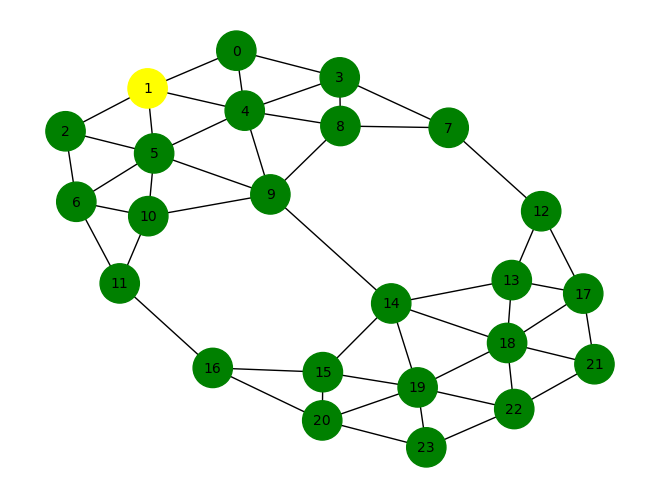

In [52]:
print("problem size", instance.size)
print("fire starts", instance.problem.fire_starts)
print("num teams", instance.problem.num_teams)
draw_graph(instance.problem.graph, instance.problem.fire_starts)

In [53]:
displayer = Displayer()
gene_displayer = GeneEvolutionRenderer()

## The Run

In [55]:
data = optimize_and_collect(instance)

[2025-02-05 23:43:00][  0]     0.08183622     0.08160448 { 37.00000000  48.49600000 292.00000000  19.32154197}
[2025-02-05 23:43:00][  1]     0.16182971     0.07557297 { 38.00000000  49.97200000 270.00000000  22.37916924}
[2025-02-05 23:43:00][  2]     0.23315263     0.06899905 { 37.00000000  50.08400000 270.00000000  15.23722232}
[2025-02-05 23:43:00][  3]     0.28845716     0.05339170 { 38.00000000  51.09600000 292.00000000  26.99286543}
[2025-02-05 23:43:00][  4]     0.35238266     0.06222510 { 37.00000000  50.39400000 270.00000000  18.69349523}
[2025-02-05 23:43:00][  5]     0.40672231     0.05161738 { 38.00000000  53.17600000 292.00000000  29.03544427}
[2025-02-05 23:43:00][  6]     0.45651269     0.04758668 { 37.00000000  50.40600000 270.00000000  16.01627809}
[2025-02-05 23:43:00][  7]     0.50587296     0.04794002 { 38.00000000  53.64000000 270.00000000  27.25058531}
[2025-02-05 23:43:00][  8]     0.56504011     0.05758405 { 37.00000000  52.84600000 270.00000000  26.92779761}
[

In [56]:
evaluator = Evaluators.MainEvaluator()
solutions = correct_solutions(instance, evaluator=evaluator)

## Results

In [22]:
best_solution, best_solutions_value = max(solutions, key=lambda x: x[1])
print(f"Best solution [{best_solutions_value}]:\n{best_solution}")

Best solution [12]:
[7, 9, 11]


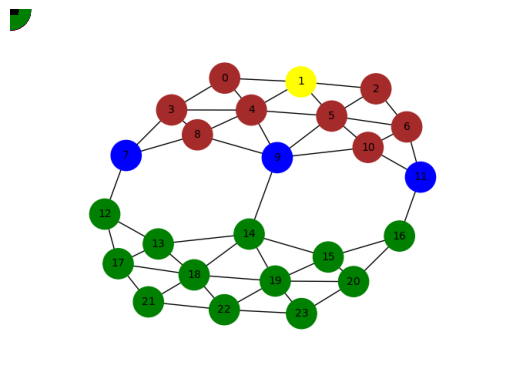

In [23]:
instance.problem.visualize_fire(displayer, best_solution)

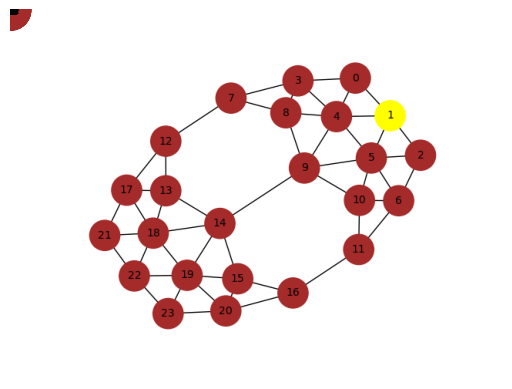

In [57]:
instance.problem.visualize_fires(displayer, solutions)

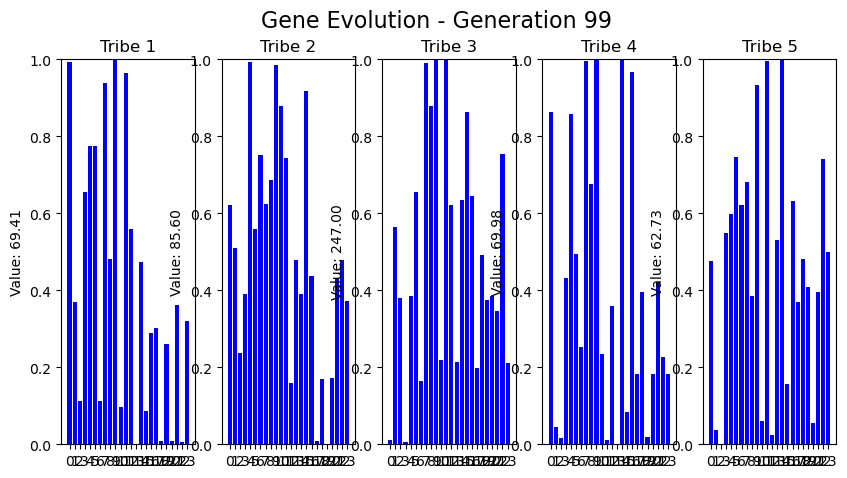

In [27]:
gene_displayer.visualize(data)

## Instance 200

In [45]:
def collect_and_visualize(local_step_size):
    instance = Instance("problems/p5.json",
        evaluator=Evaluators.CummulativeEvaluator(),
        mutator=Mutators.WalkMutator(),
        generator=Generators.TruncatedNormal(),
        fixer=Fixers.ChoiceFixer(),
        weight_generator=WeightGenerators.SoftmaxWeights(),
        gene_mutator=GeneMutators.Normal(sigma=0.01))
    
    data = optimize_and_collect(instance,
                                tribe_number=8,
                                tribe_population=30,
                                number_of_iterations=200,
                                print_updates=False,
                                record_metrics=False,
                                local_step_size=local_step_size,
                                )
    print("data collected")
    visualize_gene_evolution(data)
    return data, instance
    

data collected


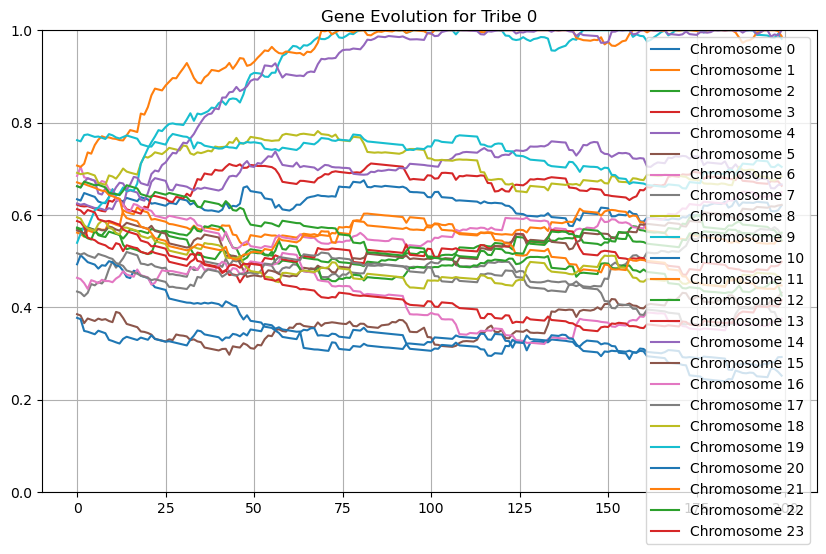

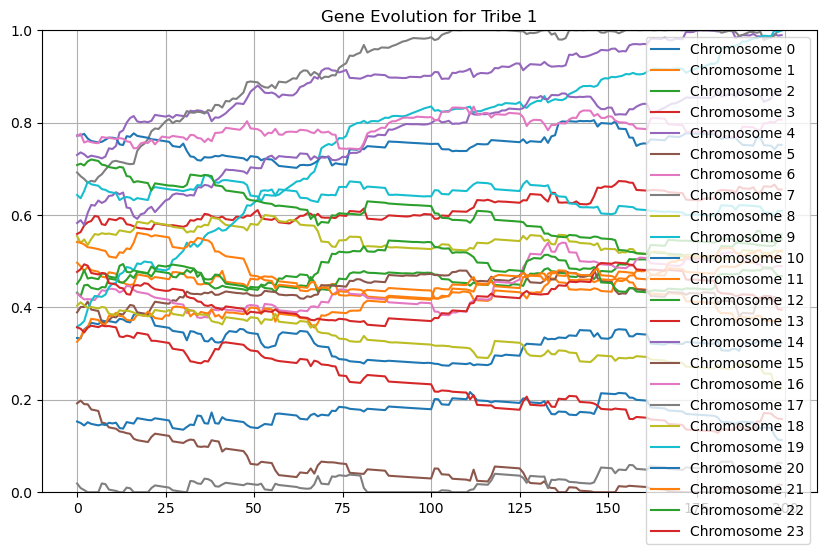

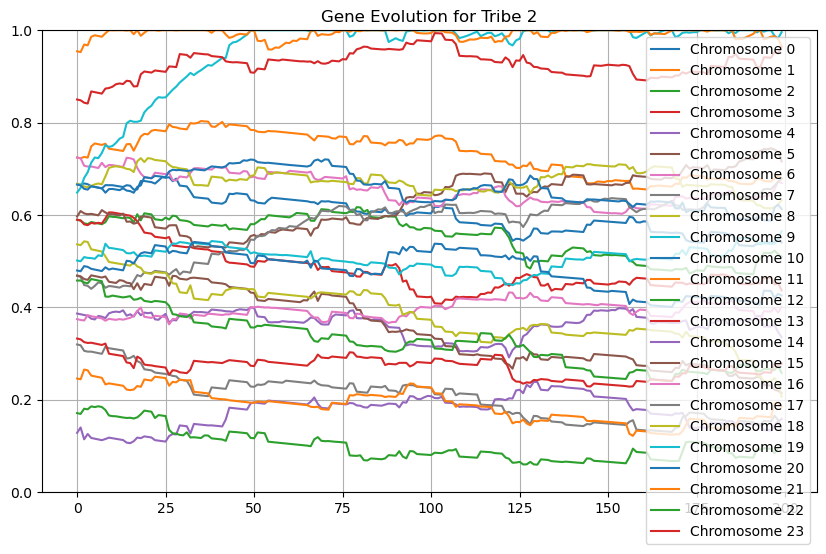

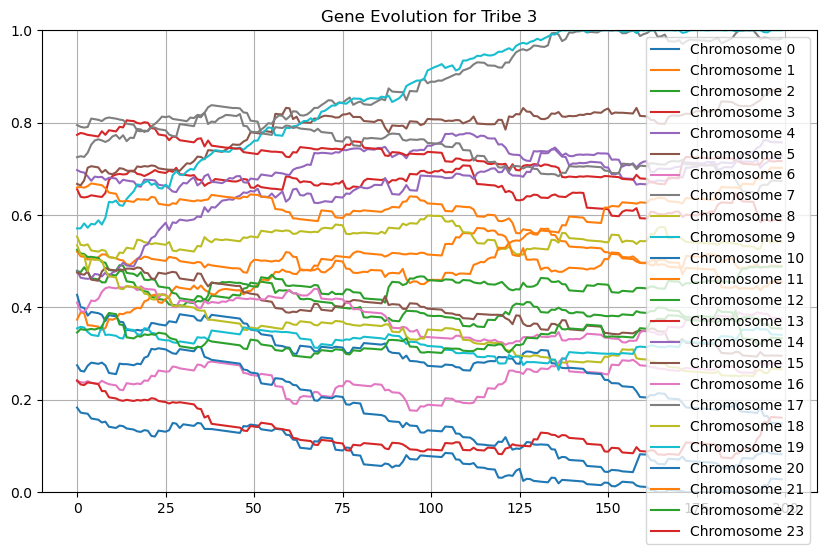

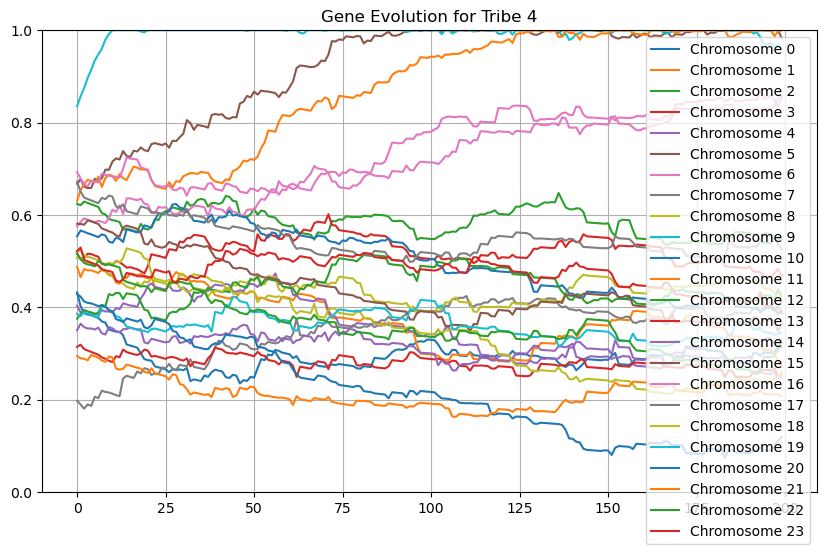

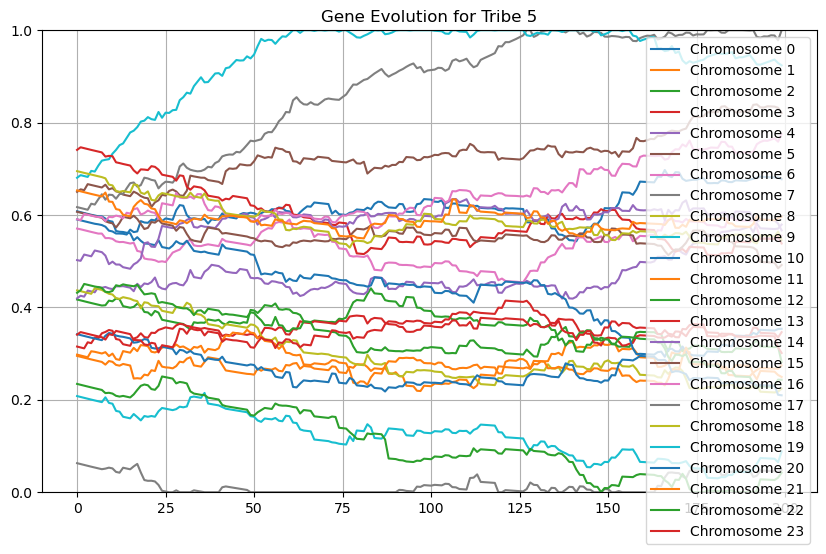

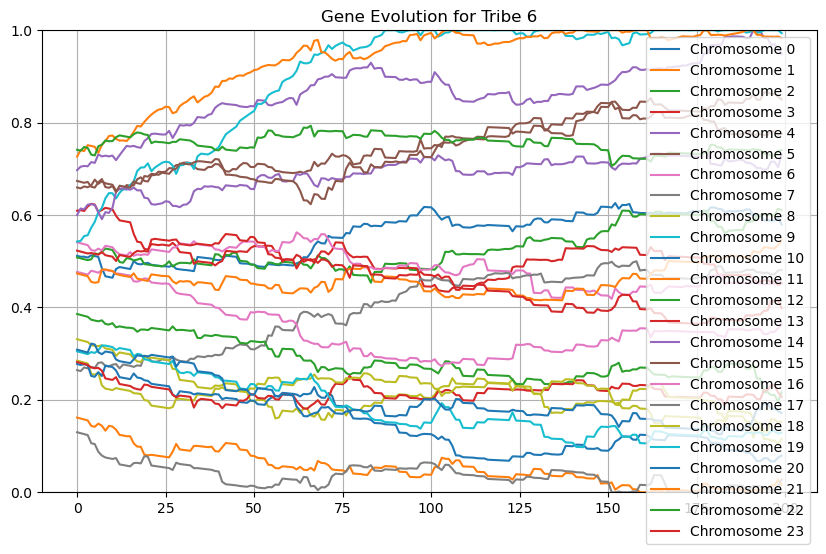

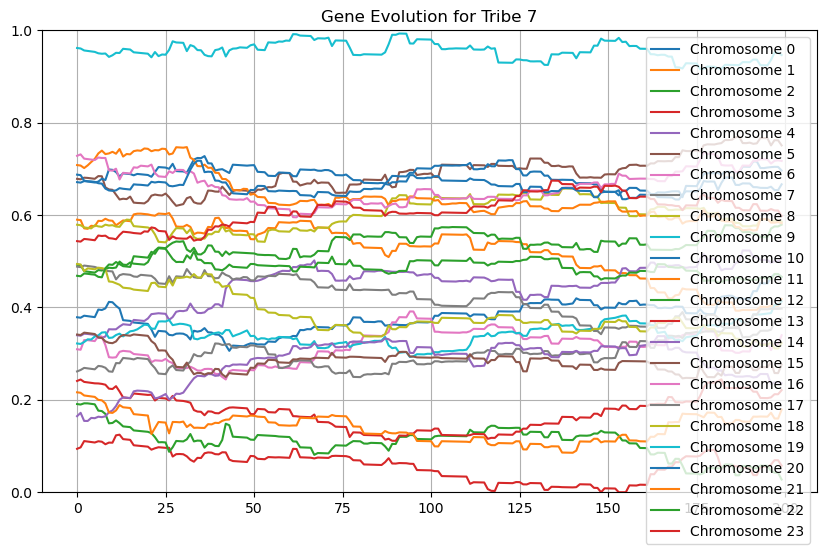

In [46]:
data200, instance200 = collect_and_visualize(0.04)

In [ ]:
gene_displayer.visualize(data200)

In [42]:
evaluator = Evaluators.MainEvaluator()
solutions200 = correct_solutions(instance200, evaluator)

## Results

In [43]:
best_solution, best_solutions_value = max(solutions, key=lambda x: x[1])
print(f"Best solution [{best_solutions_value}]:\n{best_solution}")

Best solution [12]:
[7, 9, 11]


In [44]:
solutions200

[([7, 9, 11], 12),
 ([7, 9, 16], 11),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([9, 11, 12], 11),
 ([7, 9, 11], 12),
 ([7, 9, 16], 11),
 ([7, 9, 11], 12),
 ([7, 9, 16], 11),
 ([7, 9, 16], 11),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([0, 4, 9], 0),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([7, 9, 16], 11),
 ([7, 11, 14], 11),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([9, 11, 12], 11),
 ([7, 9, 16], 11),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 9, 11], 12),
 ([7, 